<a href="https://colab.research.google.com/github/Huynh-Truong-75/Project-CNN/blob/main/Money_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**link data train https://drive.google.com/drive/folders/1u95lSRoEMSgDoTnhr444mXn0yrO5bHOW?usp=sharing**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
import matplotlib.pyplot            as plt
from matplotlib.image               import imread
from os                             import listdir
from numpy                          import asarray
from numpy                          import save
from tensorflow.keras.utils         import load_img, img_to_array
from keras.models                   import Sequential
from keras.layers                   import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot            as plt
from tensorflow.keras.utils         import load_img, img_to_array
from tensorflow.keras.optimizers    import SGD
import numpy                        as np

**Tạo Data Train**

In [ ]:
imgs, labels = list(), list()
k5 = '/content/drive/MyDrive/money_train/5k/'
k10 = '/content/drive/MyDrive/money_train/10k/'
k20 = '/content/drive/MyDrive/money_train/20k/'
k50 = '/content/drive/MyDrive/money_train/50k/'
k100 = '/content/drive/MyDrive/money_train/100k/'
k200 = '/content/drive/MyDrive/money_train/200k/'


def money_train(path, output, monney):
  for file in listdir(path):
    if file.startswith(monney):
      img = load_img(path+file,target_size=(150,150))
      img = img_to_array(img)
      imgs.append(img)
      labels.append(output)

money_train(k5, 0, str(1))
money_train(k10, 1, str(2))
money_train(k20, 2, str(3))
money_train(k50, 3, str(4))
money_train(k100, 4, str(5))
money_train(k200, 5, str(6))

In [ ]:
imgs = asarray(imgs)
labels = asarray(labels)
print(imgs.shape,labels.shape)

save('money_imgs.npy', imgs)
save('money_labels.npy', labels)

(120, 150, 150, 3) (120,)


**Xây Dựng Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 19, 19, 128)     

**Biên Dịch và Train Model**

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imgs, labels, batch_size=64,epochs=50, verbose=2)
model.save('money.h5')

Epoch 1/50
2/2 - 1s - loss: 116.7405 - accuracy: 0.1333 - 650ms/epoch - 325ms/step
Epoch 2/50
2/2 - 0s - loss: 167.6912 - accuracy: 0.1250 - 149ms/epoch - 74ms/step
Epoch 3/50
2/2 - 0s - loss: 19.6558 - accuracy: 0.1583 - 113ms/epoch - 56ms/step
Epoch 4/50
2/2 - 0s - loss: 2.3286 - accuracy: 0.3167 - 111ms/epoch - 55ms/step
Epoch 5/50
2/2 - 0s - loss: 1.6383 - accuracy: 0.3000 - 112ms/epoch - 56ms/step
Epoch 6/50
2/2 - 0s - loss: 1.8179 - accuracy: 0.2333 - 110ms/epoch - 55ms/step
Epoch 7/50
2/2 - 0s - loss: 1.5163 - accuracy: 0.3917 - 111ms/epoch - 56ms/step
Epoch 8/50
2/2 - 0s - loss: 1.3032 - accuracy: 0.6000 - 109ms/epoch - 54ms/step
Epoch 9/50
2/2 - 0s - loss: 1.0482 - accuracy: 0.6750 - 113ms/epoch - 57ms/step
Epoch 10/50
2/2 - 0s - loss: 0.8224 - accuracy: 0.7083 - 113ms/epoch - 57ms/step
Epoch 11/50
2/2 - 0s - loss: 1.0112 - accuracy: 0.6000 - 112ms/epoch - 56ms/step
Epoch 12/50
2/2 - 0s - loss: 1.2483 - accuracy: 0.5417 - 112ms/epoch - 56ms/step
Epoch 13/50
2/2 - 0s - loss: 1.

**Dự Đoán Dữ Liệu Mới**

1/1 [==============================] - 0s 17ms/step
100.000


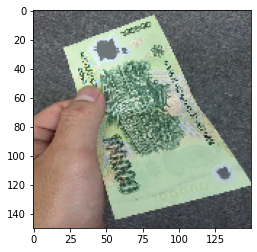

In [ ]:
def predict(prediction):
  classes = ['5000','10.000','20.000','50.000','100.000','200.000']

  img = load_img(prediction, target_size=(150,150))
  plt.imshow(img)

  imgRe = img_to_array(img)
  imgRe = imgRe.reshape(1,150,150,3)  
  imgRe = imgRe.astype('float32')
  imgRe /= 255

  a = int(np.argmax(model.predict(imgRe), axis=1))
  print(classes[a])

predict('/content/drive/MyDrive/predict/Money_predict/100k.jpg')

1/1 [==============================] - 0s 38ms/step
5000


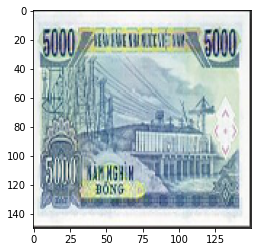

In [ ]:
predict('/content/drive/MyDrive/predict/Money_predict/5k2.jpg')

1/1 [==============================] - 0s 15ms/step
10.000


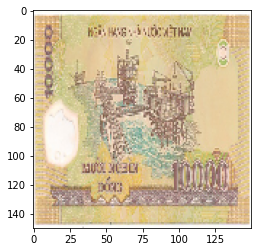

In [ ]:
predict('/content/drive/MyDrive/predict/Money_predict/10k2.jpg')